# LSTM (Long Short Term Memory) is a special kind of RNN, capable of learning long-term dependencies.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential

In [3]:
flights = sns.load_dataset('flights')

df = pd.DataFrame({'Value':flights['passengers'].values}, index=pd.date_range('1949-01-01', periods=144, freq='M'))
df.head()

,Value
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121


In [4]:
# split the data into training and test sets
train_size = int(len(df) * 0.8)
train_data , test_data = df.iloc[:train_size], df.iloc[train_size:]

In [5]:
# Normalize the data
train_mean = train_data.mean()
train_std = train_data.std()
train_data = (train_data - train_mean) / train_std
test_data = (test_data - train_mean) / train_std

In [6]:
# Convert the data into sequences
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length):
        x = data.iloc[i:(i + seq_length)].values
        y = data.iloc[i + seq_length].values
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 12
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [7]:
# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

Epoch 1/100
4/4 [==============================] - 6s 16ms/step - loss: 0.9254
Epoch 2/100
4/4 [==============================] - 0s 13ms/step - loss: 0.7992
Epoch 3/100
4/4 [==============================] - 0s 14ms/step - loss: 0.6892
Epoch 4/100
4/4 [==============================] - 0s 15ms/step - loss: 0.5759
Epoch 5/100
4/4 [==============================] - 0s 14ms/step - loss: 0.4829
Epoch 6/100
4/4 [==============================] - 0s 16ms/step - loss: 0.3828
Epoch 7/100
4/4 [==============================] - 0s 11ms/step - loss: 0.3011
Epoch 8/100
4/4 [==============================] - 0s 18ms/step - loss: 0.2369
Epoch 9/100
4/4 [==============================] - 0s 11ms/step - loss: 0.2005
Epoch 10/100
4/4 [==============================] - 0s 13ms/step - loss: 0.1923
Epoch 11/100
4/4 [==============================] - 0s 15ms/step - loss: 0.2058
Epoch 12/100
4/4 [==============================] - 0s 14ms/step - loss: 0.2068
Epoch 13/100
4/4 [==============================]

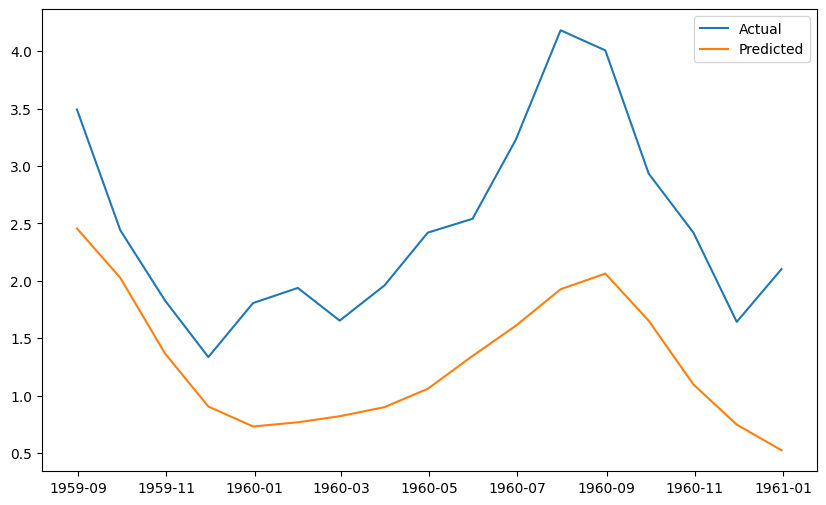

In [9]:
# Define the model
model = Sequential([
    LSTM(units=32, input_shape=(seq_length, 1)),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print('Loss:', loss)

# Make predictions
y_pred = model.predict(X_test)

# Plot the results
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[seq_length:seq_length+len(y_test)], y_test, label='Actual')
plt.plot(test_data.index[seq_length:seq_length+len(y_pred)], y_pred, label='Predicted')
plt.legend()
plt.show()
